In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [51]:
df = pd.read_csv('training.csv')
dftest = pd.read_csv('testing.csv')

In [52]:
df.describe()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_NIR,Mean_R,Mean_G,SD_NIR,...,SD_G_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,2.008512,565.869048,1.132976,165.569821,2.077679,2.229881,161.577083,163.672440,171.459226,10.131369,...,23.769881,3.098274,0.796488,0.665000,7.795536,1.594405,0.615357,0.014583,983.309524,1275.292917
std,0.634807,679.852886,0.489150,61.883993,0.699600,0.703572,63.407201,71.306748,67.973969,5.179409,...,12.836522,6.101883,0.103930,0.179086,0.670491,0.460627,0.239900,0.153677,880.013745,603.658611
min,1.000000,10.000000,0.020000,37.670000,1.000000,1.060000,30.680000,32.210000,40.120000,4.330000,...,4.020000,1.000000,0.330000,0.240000,6.290000,0.230000,0.070000,-0.360000,56.000000,336.730000
25%,1.537500,178.000000,0.787500,133.977500,1.547500,1.700000,91.040000,101.187500,120.165000,6.770000,...,13.965000,1.395000,0.757500,0.560000,7.357500,1.325000,0.460000,-0.080000,320.000000,817.405000
50%,1.920000,315.000000,1.085000,164.485000,1.940000,2.130000,187.560000,160.615000,178.345000,8.010000,...,21.135000,1.740000,0.810000,0.690000,7.790000,1.660000,0.620000,-0.040000,776.000000,1187.025000
75%,2.375000,667.000000,1.410000,221.895000,2.460000,2.680000,210.940000,234.815000,236.002500,11.500000,...,29.957500,2.285000,0.870000,0.810000,8.260000,1.945000,0.810000,0.120000,1412.500000,1588.427500
max,4.190000,3659.000000,2.890000,244.740000,4.700000,4.300000,246.350000,253.080000,253.320000,36.400000,...,60.020000,51.540000,0.950000,0.980000,9.340000,2.340000,1.000000,0.350000,6232.000000,3806.360000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Columns: 148 entries, class to GLCM3_140
dtypes: float64(133), int64(14), object(1)
memory usage: 194.4+ KB


In [54]:
print('Null and duplicate values for the Training set')

print('Total null values:')
print(df.isnull().sum().sum())
print('Total duplicate values:')
print(df.duplicated().sum())

Null and duplicate values for the Training set
Total null values:
0
Total duplicate values:
0


In [55]:
print('Null and duplicate values for the testing set')

print('Total null values:')
print(dftest.isnull().sum().sum())
print('Total duplicate values:')
print(dftest.duplicated().sum())

Null and duplicate values for the testing set
Total null values:
0
Total duplicate values:
0


In [56]:
df.nunique()

class              9
BrdIndx          120
Area             155
Round            113
Bright           167
                ... 
Dens_140         103
Assym_140         71
NDVI_140          52
BordLngth_140    146
GLCM3_140        166
Length: 148, dtype: int64

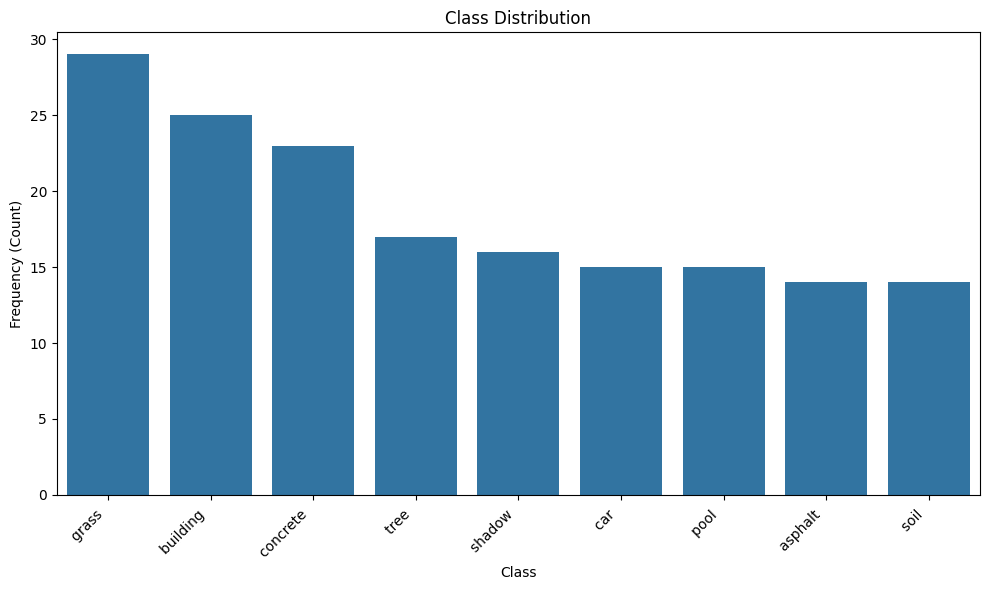

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df, order=df['class'].value_counts().index) 
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency (Count)')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

Top 5 features by F score:
- Mean_NIR
- NDVI
- NDVI_40
- Mean_NIR_60
- NDVI_60


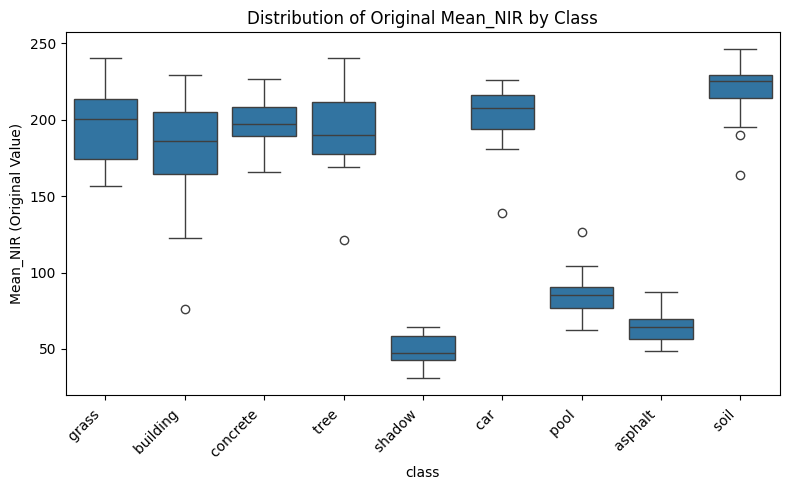

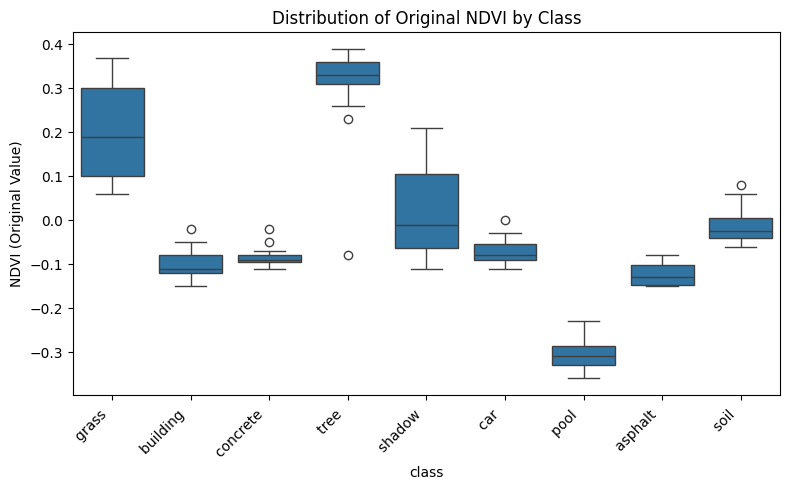

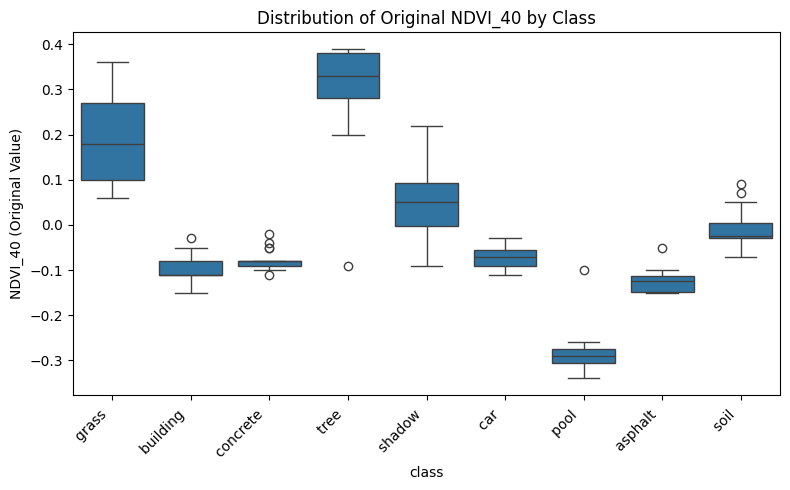

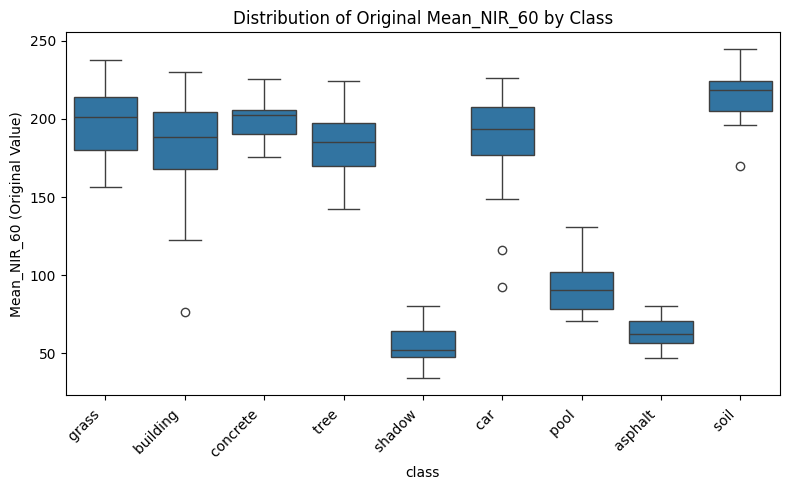

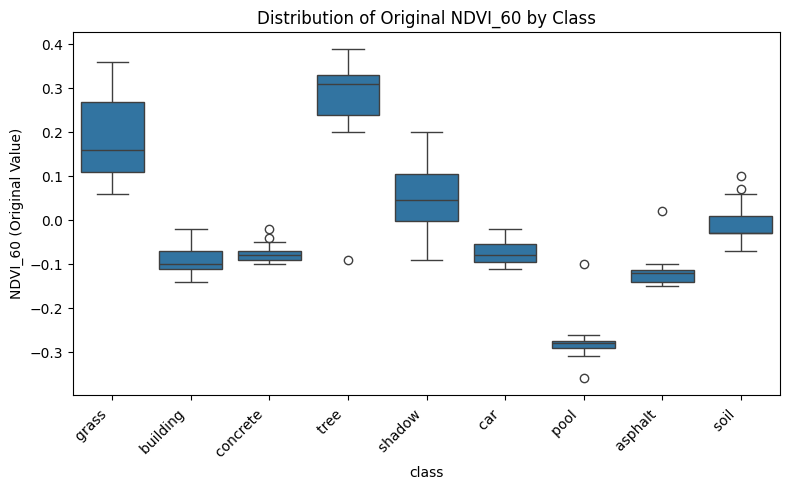

In [59]:
y = df['class']
x = df.drop('class', axis=1)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

selector = SelectKBest(score_func=f_classif, k=min(5, x.shape[1]))
selector.fit(x, y)

selected_features_indices = selector.get_support(indices=True)
top_features_names = x.columns[selected_features_indices].tolist()

print("Top 5 features by F score:")
for name in top_features_names:
    print(f"- {name}")

df_plot_selected = x[top_features_names].copy()
df_plot_selected['class'] = y.reset_index(drop=True)
class_order_for_plot = df['class'].value_counts().index

for feature_name in top_features_names:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='class', y=feature_name, data=df_plot_selected, order=class_order_for_plot)
    plt.title(f'Distribution of Original {feature_name} by Class')
    plt.ylabel(f'{feature_name} (Original Value)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()